参考サイト：https://pydmd.github.io/PyDMD/tutorial10paramdmd.html

In [ ]:
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
from scipy import io
from pydmd import DMD
from pydmd.plotter import plot_summary

In [36]:
vortall_mat = io.loadmat('./CYLINDER_ALL.mat')
X = vortall_mat['VORTALL']
time_steps = X.shape[1]
width = 199
height = 449
time_steps

151

In [26]:
nx = 449
ny = 199
dt = 0.2
xx, yy = np.meshgrid(np.linspace(-1, 8, nx), np.linspace(-2, 2, ny))

def cylinder_clean_data(X, fill=0):
    uu = X.reshape((ny, nx, -1), order="F")
    uu[(xx**2 + yy**2) < 0.5**2, :] = fill

    return uu.reshape((ny * nx, -1), order="F")


def reshaping(X):
    return X.reshape((ny, nx), order="F")

cylinder_idx = (xx**2 + yy**2) < 0.5**2


In [27]:
dmd = DMD(
    svd_rank=-1, exact=True, sorted_eigs=False, tikhonov_regularization=None
)
dmd.fit(X)

c:\Users\hamma\AppData\Local\Programs\Python\Python311\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 9585725.906123186. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


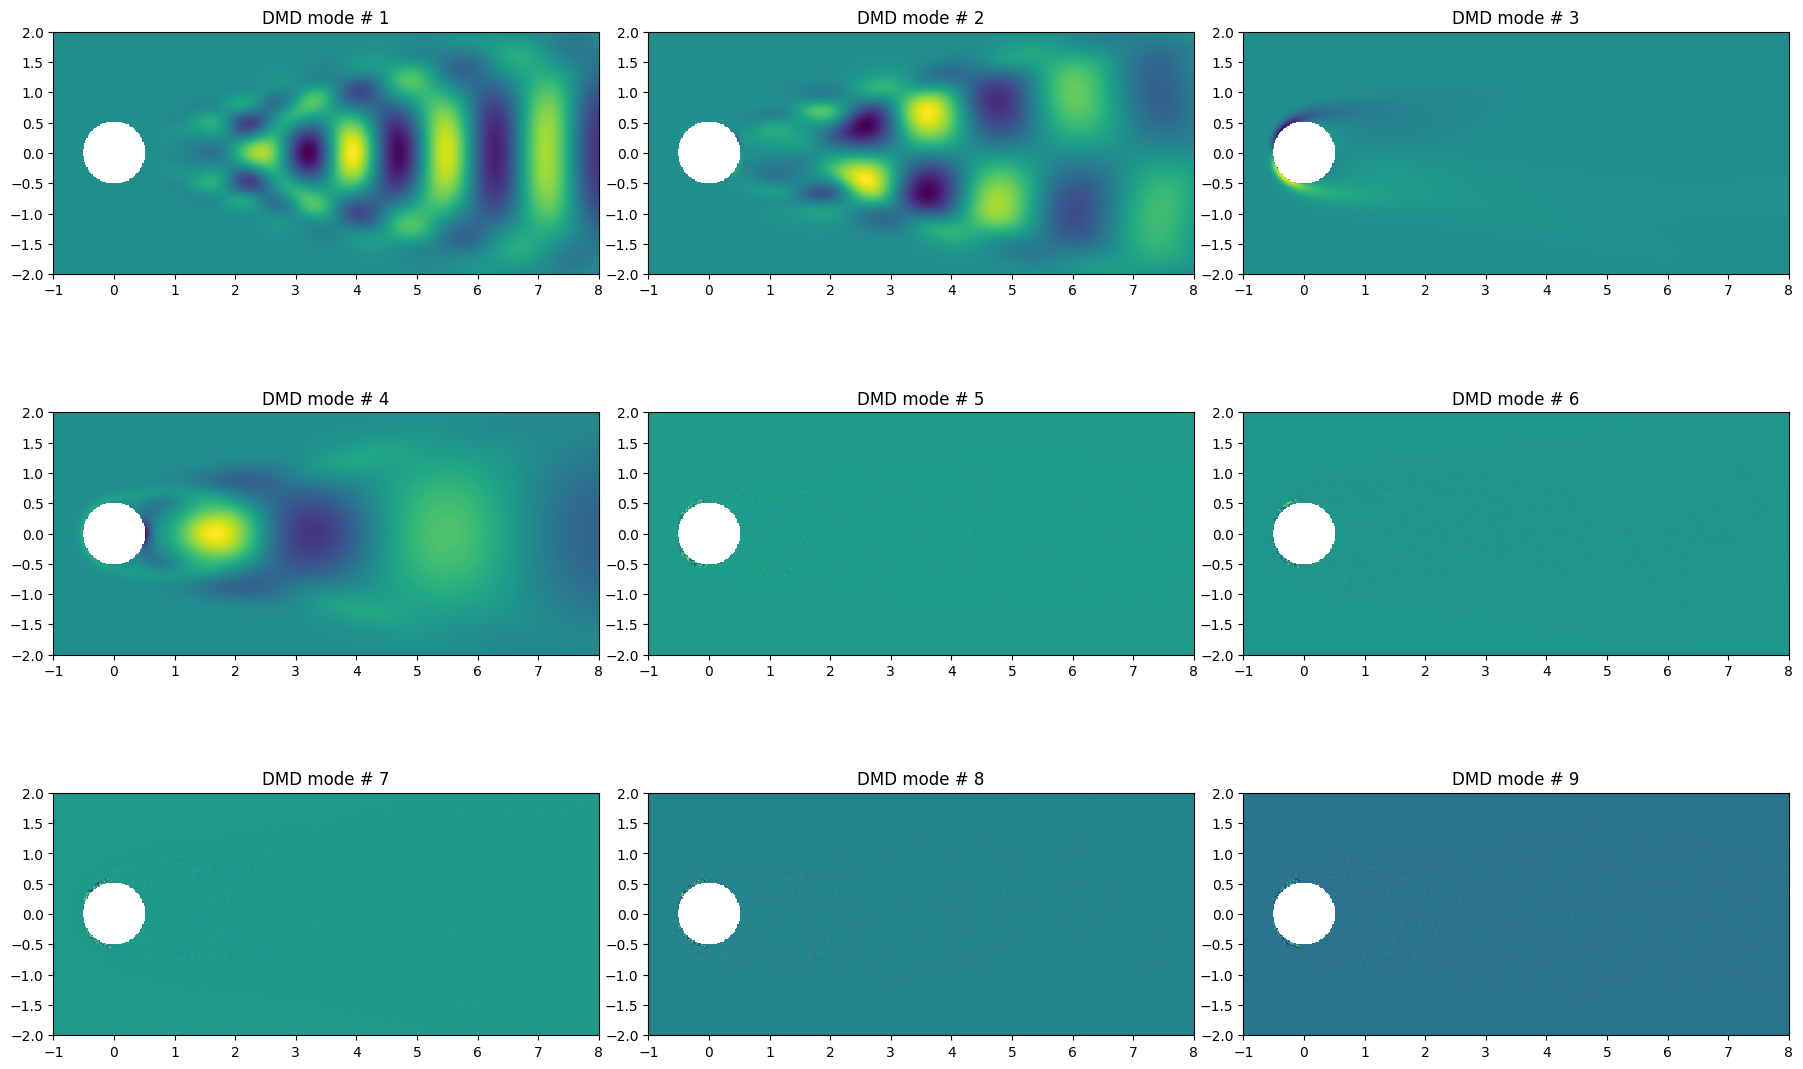

In [28]:
n_mode = np.arange(0, 18, 2)

fig, ax = plt.subplots(3, 3, figsize=(18, 12))

for i in range(3):
    for j in range(3):
        to_plot = np.real(reshaping(dmd.modes[:, n_mode[((i) * 3) + j]].copy()))
        to_plot[cylinder_idx] = np.nan
        im = ax[i, j].imshow(to_plot, extent=[-1, 8, -2, 2])
        ax[i, j].set_title(
            "DMD mode # {:d}".format(int((n_mode[((i) * 3) + j] + 2) / 2))
        )


fig.tight_layout()

(-1.0999950488345394,
 1.1000023576963098,
 -1.0999987032654246,
 1.0999987032654246)

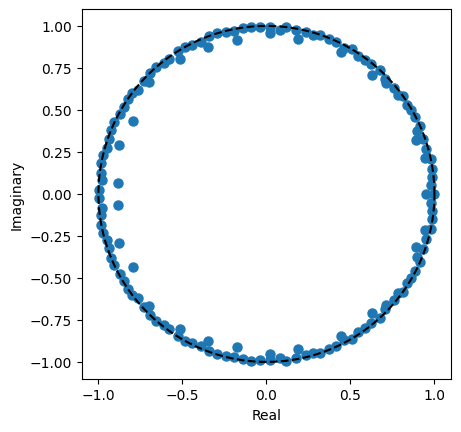

In [30]:
plt.plot(np.real(dmd.eigs), np.imag(dmd.eigs), ".", markersize=13)

theta = np.linspace(0, 2 * np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--")

plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axis("square")

In [31]:
dmd = DMD(
    svd_rank=-1, exact=True, sorted_eigs=False, tikhonov_regularization=1e-8
)
dmd.fit(X)

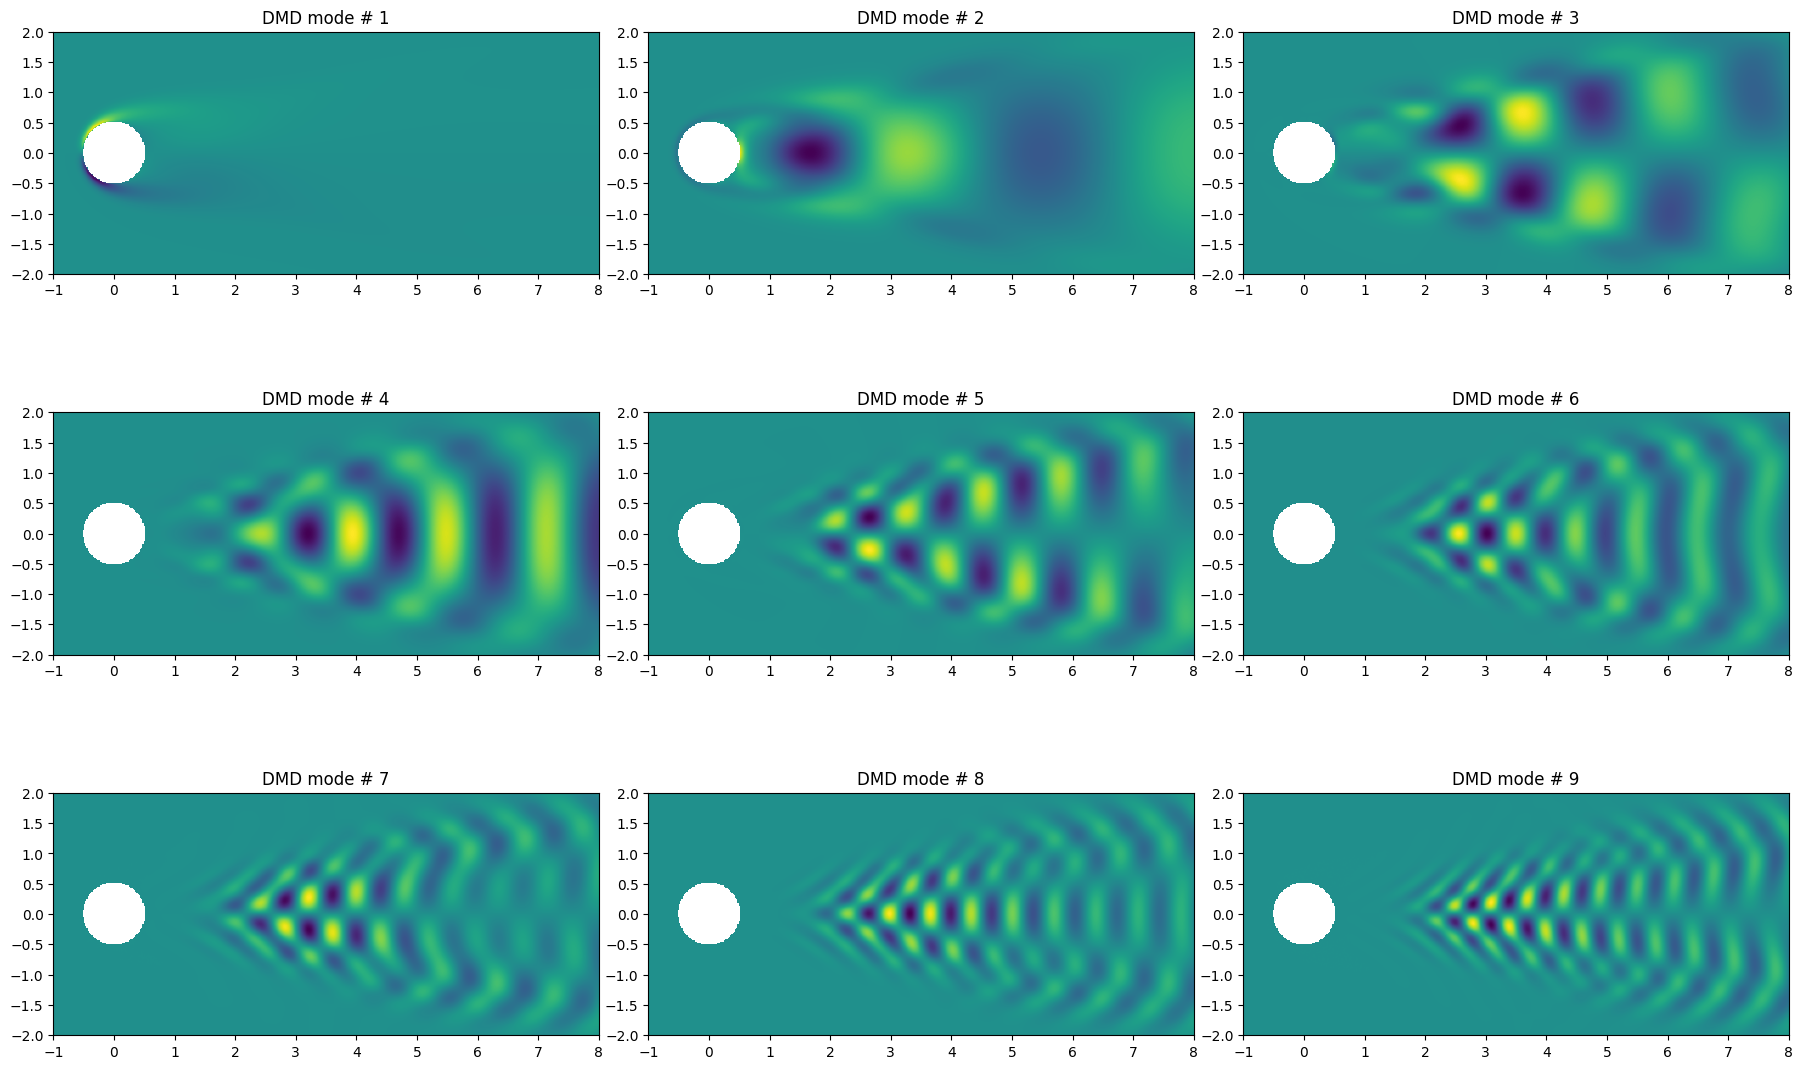

In [32]:
n_mode = np.arange(0, 18, 2)

fig, ax = plt.subplots(3, 3, figsize=(18, 12))

for i in range(3):
    for j in range(3):
        to_plot = np.real(reshaping(dmd.modes[:, n_mode[((i) * 3) + j]].copy()))
        to_plot[cylinder_idx] = np.nan
        im = ax[i, j].imshow(to_plot, extent=[-1, 8, -2, 2])
        ax[i, j].set_title(
            "DMD mode # {:d}".format(int((n_mode[((i) * 3) + j] + 2) / 2))
        )


fig.tight_layout()

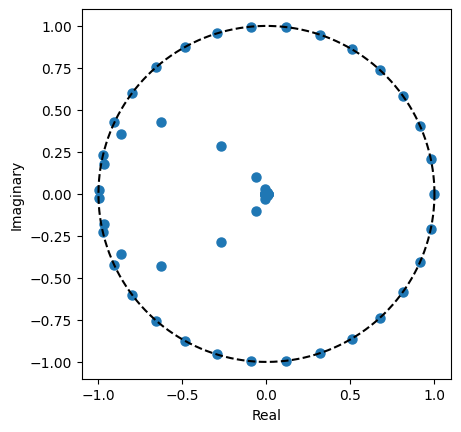

In [33]:
plt.plot(np.real(dmd.eigs), np.imag(dmd.eigs), ".", markersize=13)

theta = np.linspace(0, 2 * np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--")

plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.axis("square");

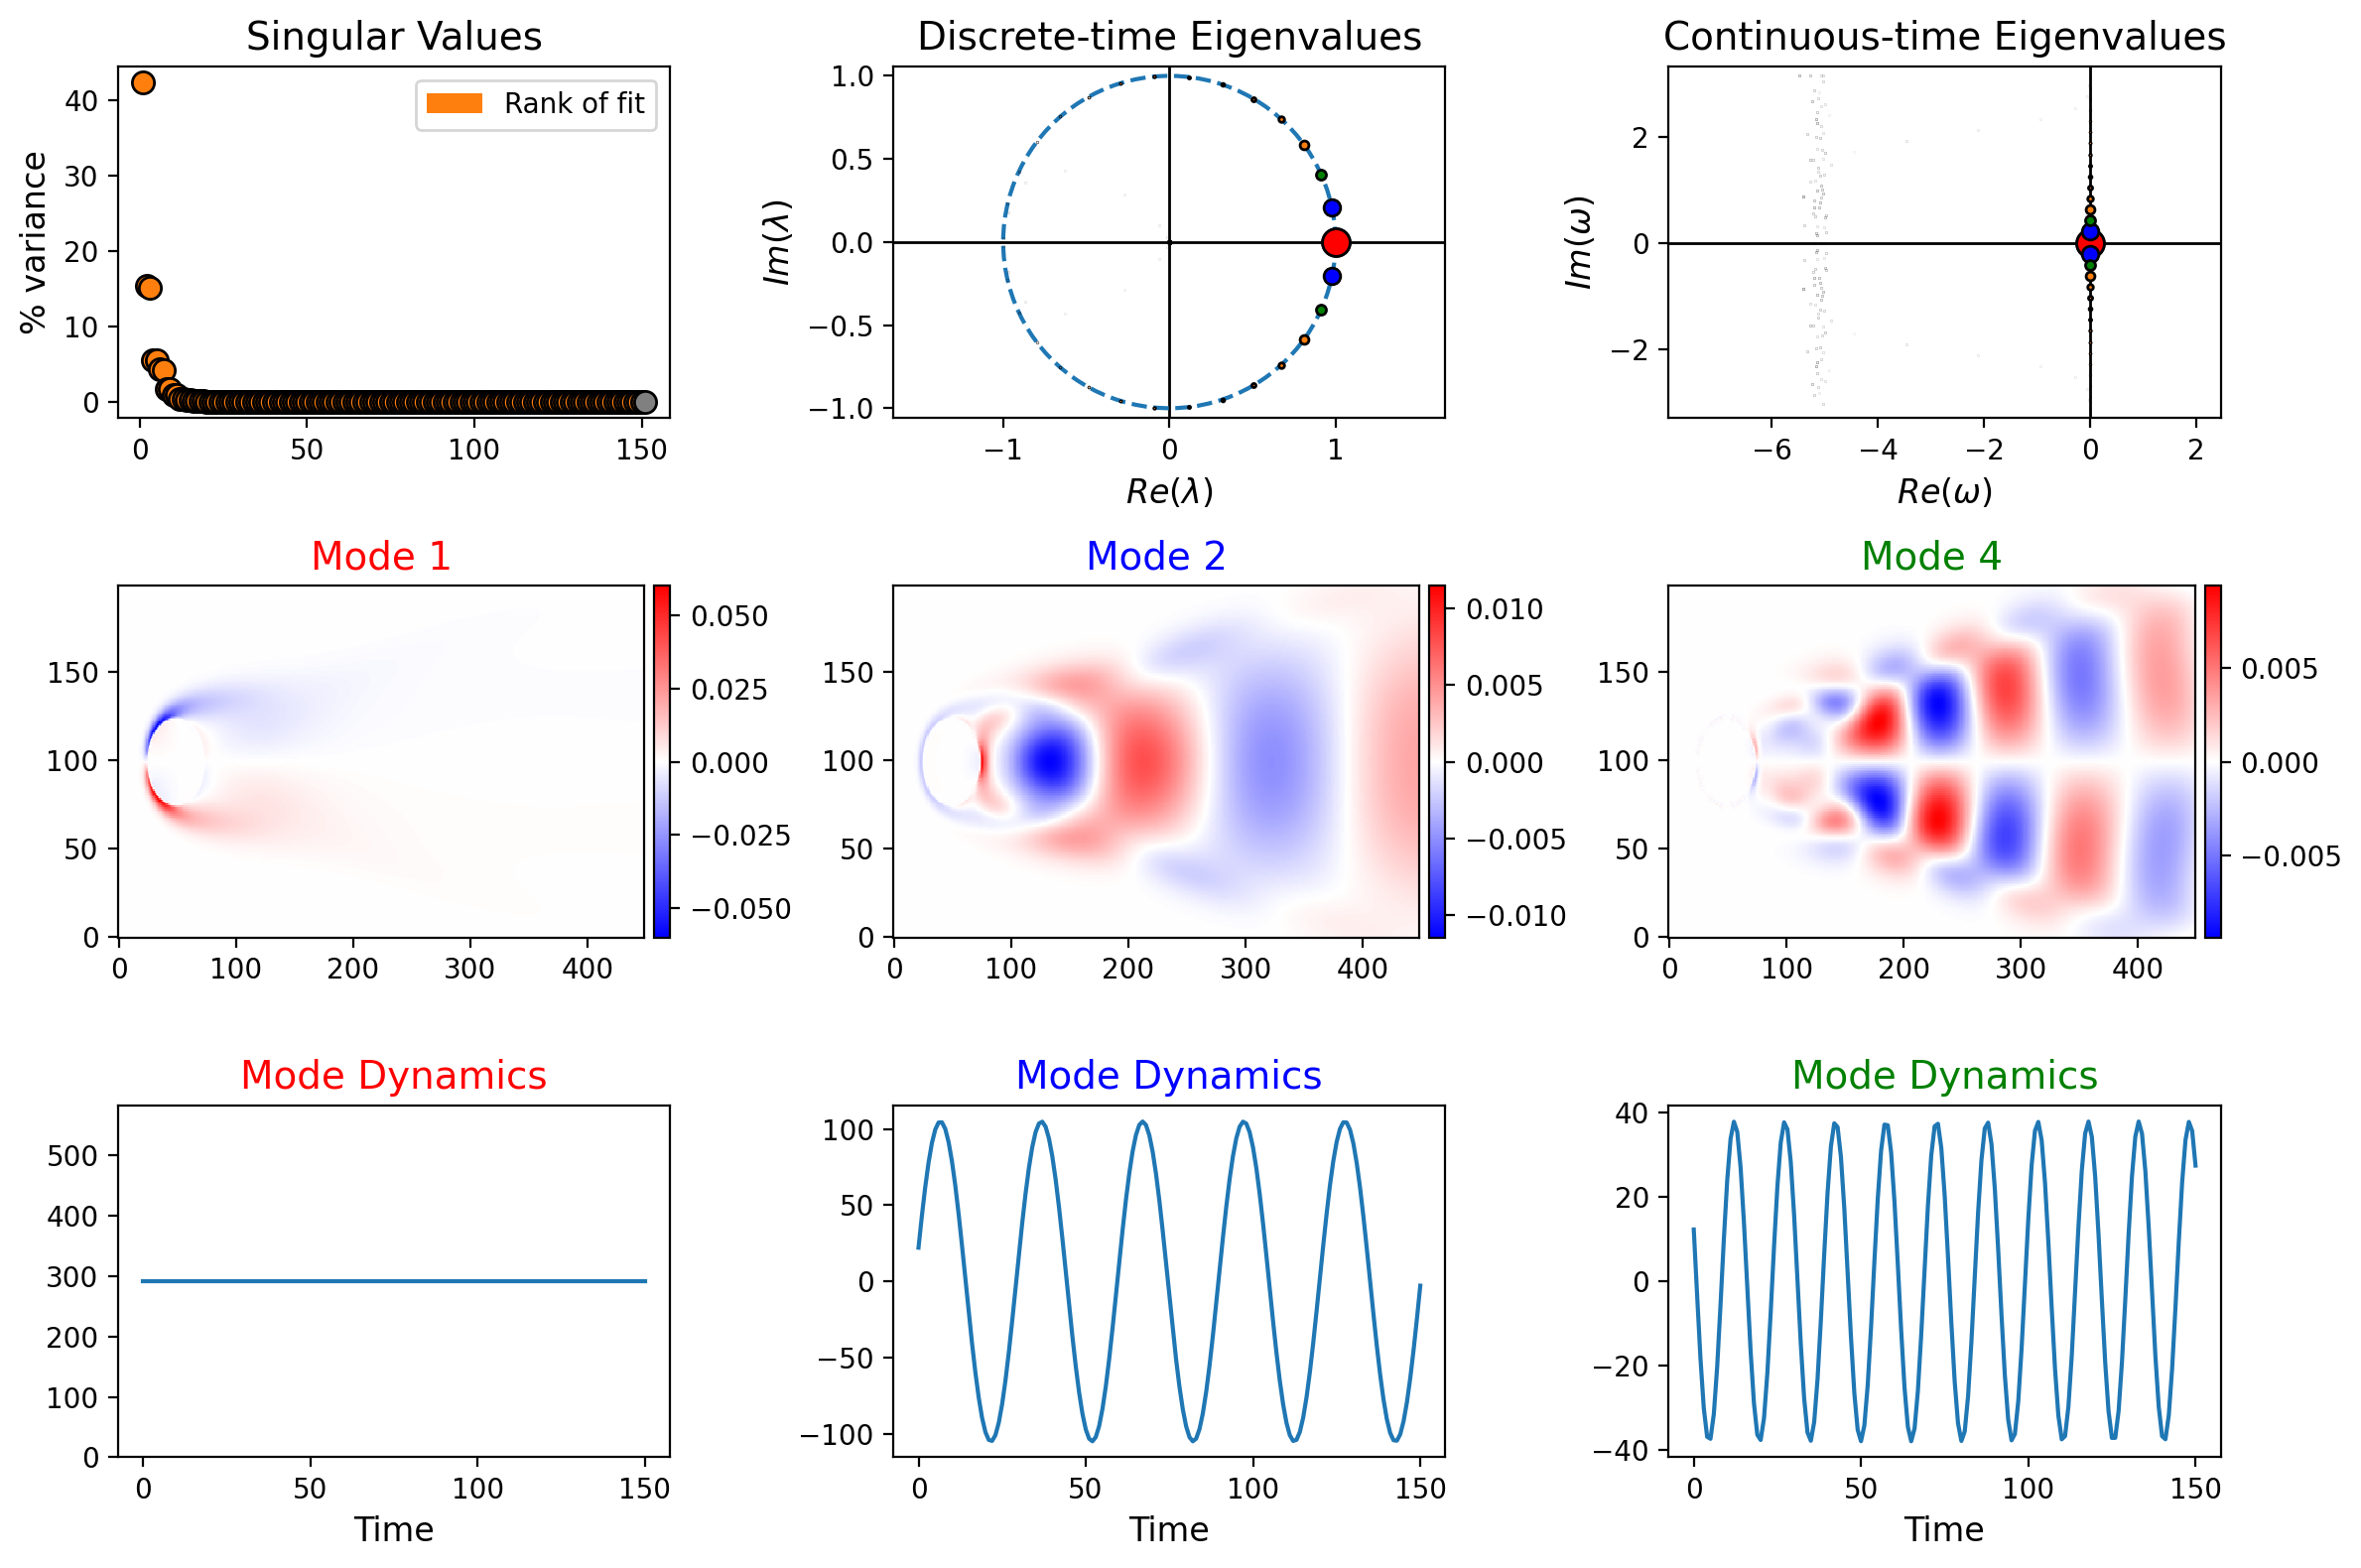

In [59]:
plot_summary(
    dmd, # <-- Fitted PyDMD model. Can be DMD, BOPDMD, etc.
    snapshots_shape=(449, 199),
    max_sval_plot=151,
    index_modes=[0,1,3]
)